In [1]:
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False   
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 导入训练集和测试集数据
data1 = pd.read_excel('训练集.xlsx',engine='openpyxl')
data2 = pd.read_excel('测试集.xlsx',engine='openpyxl')
print(data1)
print(data2)


     gender  Age  CA125  CA153  CA199   CEA   AFP     HGB     PLT   WBC  \
0         1   61  11.30  17.80  93.52  3.26  1.10  101.00  223.00  7.41   
1         2   67  13.20   9.10   7.24  2.11  1.10  115.00  264.00  5.11   
2         1   66   6.30   8.40  87.81  3.17  2.78  147.00  340.00  5.34   
3         1   34  10.70   9.10   8.97  2.91  3.17  154.00  279.00  7.61   
4         1   65  10.50   6.50   5.10  5.00  3.20  132.00  209.00  6.00   
..      ...  ...    ...    ...    ...   ...   ...     ...     ...   ...   
402       2   51  20.51  12.16   9.93  3.07  1.44  167.26  315.24  2.39   
403       1   52  15.81  20.47   2.34  1.44  6.33  145.35  312.54  3.11   
404       2   59  10.03  18.75   8.77  4.19  3.30  143.22  214.70  6.48   
405       1   69  12.73  12.47   7.76  1.57  9.59  146.23  470.85  6.08   
406       2   24  21.92  17.69   1.53  3.12  5.07  139.07  439.25  8.27   

       PT    APTT    TT    F1B    D2   TBiL     TP      UA     Cr  cancer  
0    14.40  33.50  18.6

Spearman相关系数矩阵:
          gender       Age     CA125     CA153     CA199       CEA       AFP  \
gender       1.0   -0.0396  0.105322  0.041652 -0.036174 -0.166542 -0.062146   
Age      -0.0396       1.0 -0.083795 -0.085604 -0.014619  0.245265 -0.066285   
CA125   0.105322 -0.083795       1.0  0.100042  0.111389    -0.106  0.020795   
CA153   0.041652 -0.085604  0.100042       1.0  0.037657 -0.040206  0.073763   
CA199  -0.036174 -0.014619  0.111389  0.037657       1.0  0.063402  0.037652   
CEA    -0.166542  0.245265    -0.106 -0.040206  0.063402       1.0 -0.040363   
AFP    -0.062146 -0.066285  0.020795  0.073763  0.037652 -0.040363       1.0   
HGB    -0.172073 -0.256462  0.050344  0.099359  0.051095  -0.08335   0.20865   
PLT     0.102829 -0.174127  0.184523  0.119362  0.106915   -0.0978 -0.006926   
WBC     -0.05207  0.032022  0.093532   0.04636  0.043628 -0.000516 -0.018233   
PT     -0.006618 -0.142399  0.129788  0.101927  0.114537 -0.046616  0.013283   
APTT   -0.066077 -0.1590

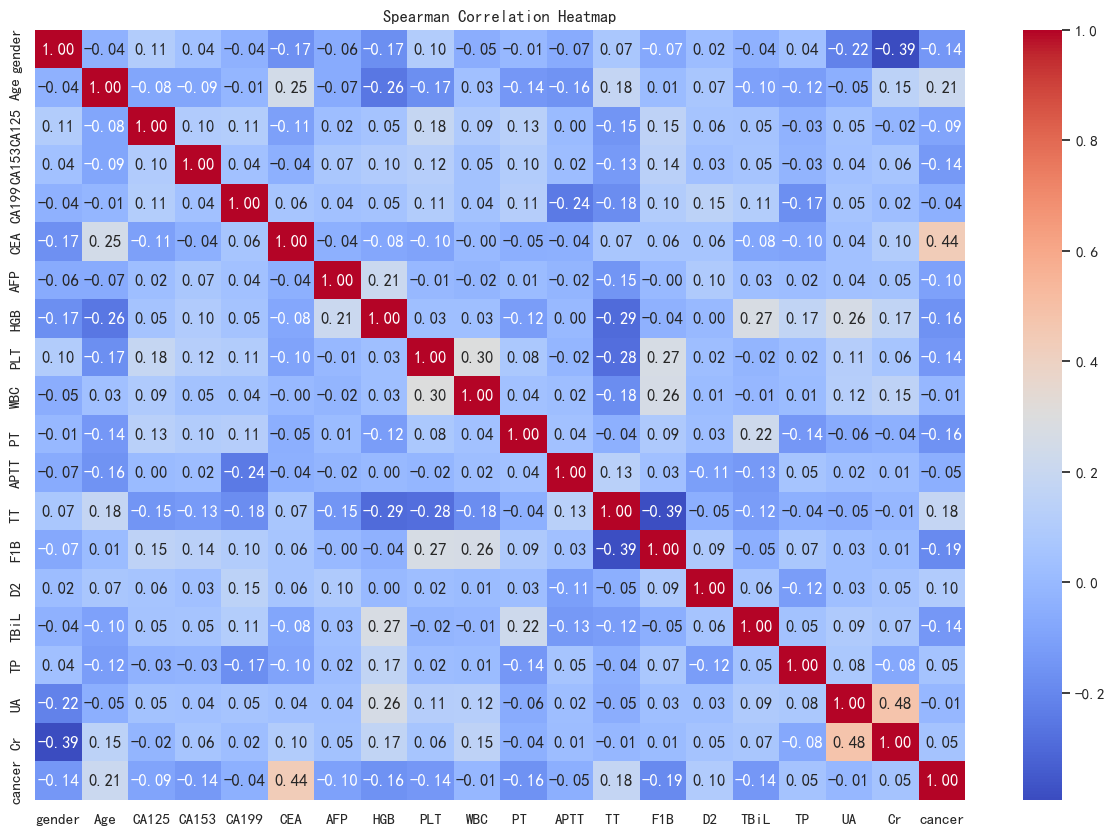


相关系数大于0.6的相关系数对:
  Feature 1 Feature 2 Correlation
0     CA153     CA153         1.0
1       PLT       PLT         1.0
2      APTT      APTT         1.0
3      TBiL      TBiL         1.0


In [3]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# 导入训练集数据
data1 = pd.read_excel('训练集.xlsx', engine='openpyxl')

# 创建一个空的DataFrame来存储相关系数
correlation_matrix = pd.DataFrame(index=data1.columns, columns=data1.columns)

# 循环计算所有特征之间的Spearman相关系数
for col1 in data1.columns:
    for col2 in data1.columns:
        spearman_corr, _ = spearmanr(data1[col1], data1[col2])
        correlation_matrix.loc[col1, col2] = spearman_corr

# 打印相关系数矩阵
print("Spearman相关系数矩阵:")
print(correlation_matrix)

# 绘制相关系数矩阵的热力图（显示数字）
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.astype(float), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

# 筛选出大于0.6的相关系数对
strong_correlations = correlation_matrix[correlation_matrix > 0.6]
strong_correlations = strong_correlations[strong_correlations < 1.0].stack().reset_index()
strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# 打印相关系数大于0.6的相关系数对
print("\n相关系数大于0.6的相关系数对:")
print(strong_correlations)


In [4]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  407 non-null    int64  
 1   Age     407 non-null    int64  
 2   CA125   407 non-null    float64
 3   CA153   407 non-null    float64
 4   CA199   407 non-null    float64
 5   CEA     407 non-null    float64
 6   AFP     407 non-null    float64
 7   HGB     407 non-null    float64
 8   PLT     407 non-null    float64
 9   WBC     407 non-null    float64
 10  PT      407 non-null    float64
 11  APTT    407 non-null    float64
 12  TT      407 non-null    float64
 13  F1B     407 non-null    float64
 14  D2      407 non-null    float64
 15  TBiL    407 non-null    float64
 16  TP      407 non-null    float64
 17  UA      407 non-null    float64
 18  Cr      407 non-null    float64
 19  cancer  407 non-null    int64  
dtypes: float64(17), int64(3)
memory usage: 63.7 KB
<class 'pandas.core.frame.Dat

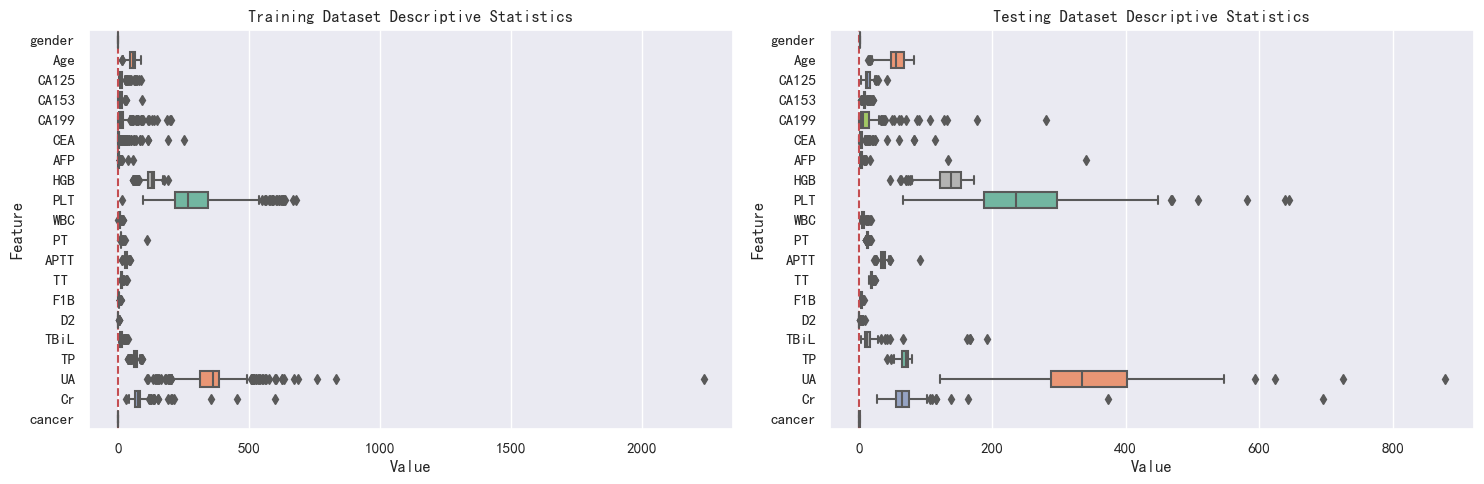

特征的P值:
gender: 0.8032
Age: 0.9752
CA125: 0.0981
CA153: 0.0232
CA199: 0.0046
CEA: 0.2292
AFP: 0.1601
HGB: 0.0000
PLT: 0.0000
WBC: 0.0273
PT : 0.0000
APTT: 0.0000
TT : 0.0000
F1B: 0.9837
D2: 0.0000
TBiL: 0.4856
TP: 0.0012
UA: 0.0850
Cr: 0.0000
cancer: 0.0968


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data1 = pd.read_excel("训练集.xlsx")
data2 = pd.read_excel("测试集.xlsx")

# 绘制描述性统计图
plt.figure(figsize=(15, 5))

# 绘制训练集的描述性统计图
plt.subplot(1, 2, 1)
plt.title('Training Dataset Descriptive Statistics')
sns.boxplot(data=data1, orient="h", palette="Set2")
plt.xlabel('Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='r', linestyle='--')  # 添加红色虚线表示零值

# 绘制测试集的描述性统计图
plt.subplot(1, 2, 2)
plt.title('Testing Dataset Descriptive Statistics')
sns.boxplot(data=data2, orient="h", palette="Set2")
plt.xlabel('Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='r', linestyle='--')  # 添加红色虚线表示零值

plt.tight_layout()  # 调整子图布局，使它们不重叠
plt.show()
from scipy.stats import mannwhitneyu

# 对于每个特征，计算训练集和测试集之间的P值
p_values = {}
for col in data1.columns:
    stat, p_value = mannwhitneyu(data1[col], data2[col])
    p_values[col] = p_value

# 显示每个特征的P值
print("特征的P值:")
for col, p_value in p_values.items():
    print(f"{col}: {p_value:.4f}")



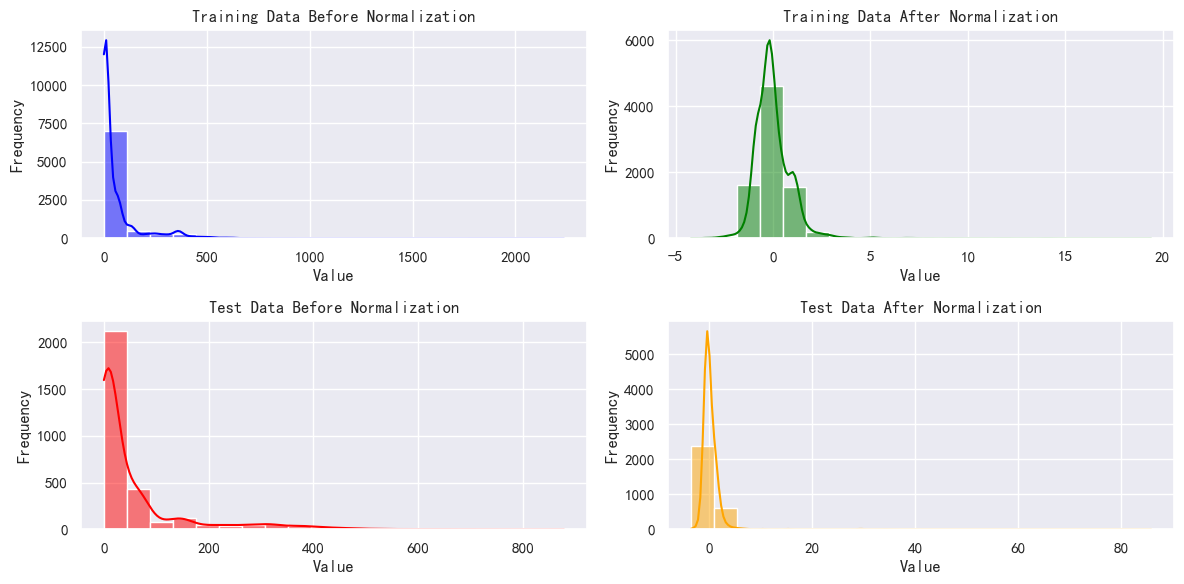

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 假设 data1 和 data2 分别是训练集和测试集数据

# 创建一个 2x2 的子图画布，用于分别展示归一化前后的训练集和测试集数据分布情况
plt.figure(figsize=(12, 6))

# 在进行归一化之前的训练集数据分布情况
plt.subplot(2, 2, 1)  # 子图 1：归一化前的训练集数据分布
# 绘制直方图，展示归一化前的训练集数据分布情况
sns.histplot(data1.values.flatten(), bins=20, kde=True, color='blue')  # 使用 seaborn 的 histplot 函数绘制直方图
plt.title('Training Data Before Normalization')  # 设置子图标题
plt.xlabel('Value')  # 设置 x 轴标签
plt.ylabel('Frequency')  # 设置 y 轴标签

# 在进行归一化之后的训练集数据分布情况
ss = StandardScaler()  # 创建 StandardScaler 对象，用于归一化处理
x_train_normalized = ss.fit_transform(data1)  # 对训练集数据进行归一化处理

plt.subplot(2, 2, 2)  # 子图 2：归一化后的训练集数据分布
# 绘制直方图，展示归一化后的训练集数据分布情况
sns.histplot(x_train_normalized.flatten(), bins=20, kde=True, color='green')  # 使用 seaborn 的 histplot 函数绘制直方图
plt.title('Training Data After Normalization')  # 设置子图标题
plt.xlabel('Value')  # 设置 x 轴标签
plt.ylabel('Frequency')  # 设置 y 轴标签

# 在进行归一化之前的测试集数据分布情况
plt.subplot(2, 2, 3)  # 子图 3：归一化前的测试集数据分布
# 绘制直方图，展示归一化前的测试集数据分布情况
sns.histplot(data2.values.flatten(), bins=20, kde=True, color='red')  # 使用 seaborn 的 histplot 函数绘制直方图
plt.title('Test Data Before Normalization')  # 设置子图标题
plt.xlabel('Value')  # 设置 x 轴标签
plt.ylabel('Frequency')  # 设置 y 轴标签

# 在进行归一化之后的测试集数据分布情况
x_test_normalized = ss.transform(data2)  # 对测试集数据进行归一化处理

plt.subplot(2, 2, 4)  # 子图 4：归一化后的测试集数据分布
# 绘制直方图，展示归一化后的测试集数据分布情况
sns.histplot(x_test_normalized.flatten(), bins=20, kde=True, color='orange')  # 使用 seaborn 的 histplot 函数绘制直方图
plt.title('Test Data After Normalization')  # 设置子图标题
plt.xlabel('Value')  # 设置 x 轴标签
plt.ylabel('Frequency')  # 设置 y 轴标签

plt.tight_layout()  # 自动调整子图布局，使得子图之间的间距合适
plt.show()  # 显示图形


[LightGBM] [Info] Number of positive: 137, number of negative: 147
[LightGBM] [Info] Total Bins 1425
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482394 -> initscore=-0.070452
[LightGBM] [Info] Start training from score -0.070452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

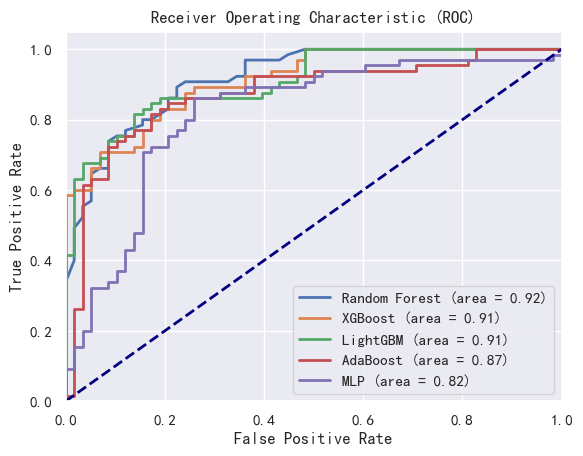

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# 读取训练集数据
train_file = "训练集.xlsx"
data1 = pd.read_excel(train_file)

# 提取特征和标签
X = data1.drop(columns=['cancer'])  # 特征
y = data1['cancer']  # 标签

# 归一化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 将数据随机划分为训练集和测试集，并指定索引
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# 定义所有模型
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(force_col_wise=True, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Tree': ExtraTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42)
}

# 存储每个模型的性能指标
metrics = {}

# 训练每个模型，并计算性能指标
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # 获取预测概率值
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)
    auc_score = roc_auc_score(y_test, y_pred_proba)  # 使用预测概率计算AUC值
    metrics[name] = {
        'Accuracy': accuracy,
        'Sensitivity': recall,
        'Specificity': specificity,
        'PPV': precision,
        'NPV': npv,
        'F1 Score': f1,
        'AUC': auc_score  # 将AUC值添加到metrics中
    }

# 打印指标表格
metrics_df = pd.DataFrame(metrics).transpose()
print(metrics_df)

# 筛选出AUC值前五的模型
sorted_auc_scores = sorted(metrics.items(), key=lambda x: x[1]['AUC'], reverse=True)[:5]
top_models = {name: models[name] for name, _ in sorted_auc_scores}

# 绘制前五个模型的ROC曲线
plt.figure()
for name, model in top_models.items():
    y_scores = model.predict_proba(X_test)[:, 1]  # 获取预测概率值
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = %0.2f)' % roc_auc)

# 绘制随机猜测的ROC曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()






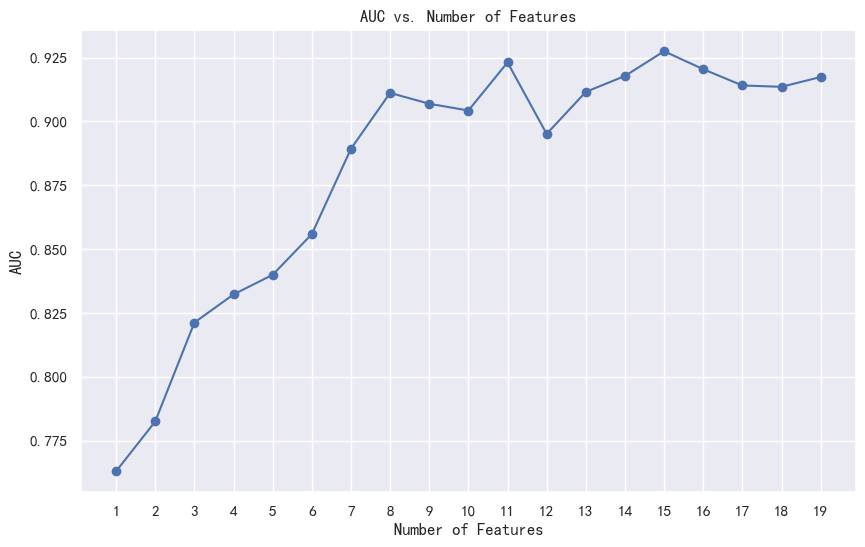

         AUC  Sensitivity  Specificity       PPV       NPV  Accuracy  \
19  0.917374     0.723077     0.896552  0.886792  0.742857  0.804878   
18  0.913528     0.753846     0.862069  0.859649  0.757576  0.804878   
17  0.914058     0.738462     0.879310  0.872727  0.750000  0.804878   
16  0.920424     0.784615     0.879310  0.879310  0.784615  0.829268   
15  0.927454     0.753846     0.862069  0.859649  0.757576  0.804878   
14  0.917772     0.800000     0.896552  0.896552  0.800000  0.845528   
13  0.911538     0.738462     0.896552  0.888889  0.753623  0.813008   
12  0.895093     0.753846     0.862069  0.859649  0.757576  0.804878   
11  0.923077     0.753846     0.879310  0.875000  0.761194  0.813008   
10  0.904244     0.769231     0.844828  0.847458  0.765625  0.804878   
9   0.906897     0.769231     0.862069  0.862069  0.769231  0.813008   
8   0.911141     0.769231     0.879310  0.877193  0.772727  0.821138   
7   0.889257     0.753846     0.862069  0.859649  0.757576  0.80

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 读取训练集数据
train_file = "训练集.xlsx"
data1 = pd.read_excel(train_file)

# 提取特征和标签
X = data1.drop(columns=['cancer'])  # 特征
y = data1['cancer']  # 标签
feature_names = X.columns.tolist()  # 特征名列表

# 归一化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# 初始化随机森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 获取特征重要性排序
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # 按重要性排序

# 记录每次减少特征后的 AUC 值、特征数量和删除的特征
auc_scores = []
num_features_list = []
dropped_features_list = []

# 记录评估指标
evaluation_metrics = {
    'AUC': [],
    'Sensitivity': [],
    'Specificity': [],
    'PPV': [],
    'NPV': [],
    'Accuracy': [],
    'F1 score': []
}

# 循环逐步减少特征
num_features = X_train.shape[1]
for i in range(num_features, 0, -1):
    # 选择前 i 个重要特征
    selected_indices = sorted_indices[:i]
    X_train_subset = X_train[:, selected_indices]
    X_test_subset = X_test[:, selected_indices]
    
    # 训练模型
    rf_model.fit(X_train_subset, y_train)
    
    # 预测并计算 AUC
    y_pred_proba = rf_model.predict_proba(X_test_subset)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # 计算其他评估指标
    y_pred = rf_model.predict(X_test_subset)
    sensitivity = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    ppv = precision_score(y_test, y_pred)
    npv = precision_score(y_test, y_pred, pos_label=0)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # 记录 AUC、特征数量和其他评估指标
    auc_scores.append(auc)
    num_features_list.append(i)
    evaluation_metrics['AUC'].append(auc)
    evaluation_metrics['Sensitivity'].append(sensitivity)
    evaluation_metrics['Specificity'].append(specificity)
    evaluation_metrics['PPV'].append(ppv)
    evaluation_metrics['NPV'].append(npv)
    evaluation_metrics['Accuracy'].append(accuracy)
    evaluation_metrics['F1 score'].append(f1)
    
    # 记录删除的特征
    dropped_features = [feature_names[idx] for idx in sorted_indices[i:]]
    dropped_features_list.append(dropped_features)
    
    # 如果 AUC 下降到一定程度，输出下降前的特征
    if len(auc_scores) >= 2 and auc_scores[-2] - auc > 0.05:
        print(f"AUC dropped significantly after dropping features: {dropped_features}")

# 绘制 ROC 曲线
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, auc_scores, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.xticks(num_features_list)
plt.ylabel('AUC')
plt.title('AUC vs. Number of Features')
plt.grid(True)
plt.show()

# 创建 DataFrame 表格
df = pd.DataFrame(evaluation_metrics, index=num_features_list)
df['Dropped Features'] = dropped_features_list  # 添加删除的特征列
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)
# 将 DataFrame 输出到 Excel 文件
output_file = "evaluation_metrics.xlsx"
df.to_excel(output_file, index_label="Number of Features")
print("DataFrame 已成功保存到 Excel 文件:", output_file)


# 打印表格
print(df)



Performance Metrics:
      Accuracy  Sensitivity  Specificity       PPV       NPV  F1 Score
0     0.756098     0.714286     0.800000  0.789474  0.727273  0.750000
1     0.853659     0.769231     1.000000  1.000000  0.714286  0.869565
2     0.902439     0.888889     0.913043  0.888889  0.913043  0.888889
3     0.756098     0.727273     0.789474  0.800000  0.714286  0.761905
4     0.878049     1.000000     0.736842  0.814815  1.000000  0.897959
5     0.853659     0.875000     0.840000  0.777778  0.913043  0.823529
6     0.902439     0.857143     0.950000  0.947368  0.863636  0.900000
7     0.800000     0.888889     0.727273  0.727273  0.888889  0.800000
8     0.825000     0.875000     0.791667  0.736842  0.904762  0.800000
9     0.825000     0.727273     0.944444  0.941176  0.739130  0.820513
Mean  0.835244     0.832298     0.849274  0.842361  0.837835  0.831236


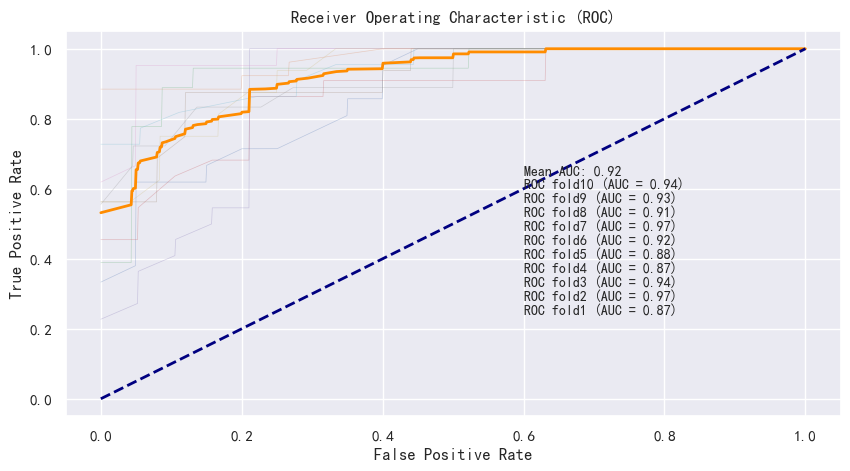

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 读取训练集数据
train_file = "训练集1.xlsx"
data1 = pd.read_excel(train_file)

# 提取特征和标签
X = data1.drop(columns=['cancer'])  # 特征
y = data1['cancer']  # 标签

# 归一化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 初始化存储所有ROC曲线的列表
all_fpr = []
all_tpr = []
all_auc = []
all_metrics = []

# 使用K折交叉验证来获取每次验证的ROC曲线数据和性能评价指标
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for fold_idx, (train_index, test_index) in enumerate(cv.split(X_normalized), 1):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 创建随机森林模型
    rf_model = RandomForestClassifier(random_state=42)
    
    # 训练模型
    rf_model.fit(X_train, y_train)
    
    # 预测概率
    y_scores = rf_model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # 计算性能指标
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    ppv = precision_score(y_test, y_pred)
    npv = tn / (tn + fn)
    f1 = f1_score(y_test, y_pred)
    
    # 存储AUC和性能指标
    all_auc.append(roc_auc)
    all_metrics.append([accuracy, sensitivity, specificity, ppv, npv, f1])
    
    # 使用插值方法使得所有数组具有相同的长度
    fpr_interp = np.linspace(0, 1, 1000)
    tpr_interp = np.interp(fpr_interp, fpr, tpr)
    
    # 将数据存储到列表中
    all_fpr.append(fpr_interp)
    all_tpr.append(tpr_interp)
    
# 计算平均AUC和性能指标
mean_auc = np.mean(all_auc, axis=0)
mean_metrics = np.mean(all_metrics, axis=0)

# 计算性能指标的平均值
mean_accuracy, mean_sensitivity, mean_specificity, mean_ppv, mean_npv, mean_f1 = mean_metrics

# 绘制所有ROC曲线
plt.figure(figsize=(10, 5))
for i in range(len(all_fpr)):
    plt.plot(all_fpr[i], all_tpr[i], lw=0.5, alpha=0.3)
plt.plot(np.mean(all_fpr, axis=0), np.mean(all_tpr, axis=0), color='darkorange', lw=2, label=f'Mean ROC (area = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.grid(True)

# 显示每一次交叉验证的AUC值
for i, auc_val in enumerate(all_auc, start=1):
    plt.text(0.6, 0.2 + 0.04 * i, f'ROC fold{i} (AUC = {auc_val:.2f})', fontsize=10)

# 显示平均AUC值
plt.text(0.6, 0.2 + 0.04 * (i + 1), f'Mean AUC: {mean_auc:.2f}', fontsize=10)

# 创建性能评价指标的表格
metrics_table = pd.DataFrame(all_metrics, columns=['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'])
metrics_table.loc['Mean'] = [mean_accuracy, mean_sensitivity, mean_specificity, mean_ppv, mean_npv, mean_f1]

# 显示性能评价指标的表格
print("Performance Metrics:")
print(metrics_table)

plt.show()




Best Threshold: 0.43


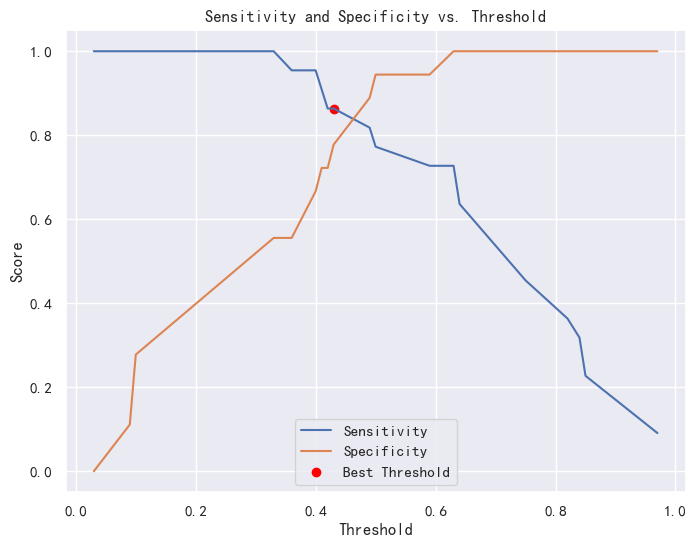

In [10]:
# 寻找最佳截断值
best_threshold = None
best_f1_score = 0

for threshold in thresholds:
    y_pred_thresholded = (y_scores[:, 1] > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresholded)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print("Best Threshold:", best_threshold)

# 绘制敏感性和特异性曲线
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='Sensitivity')
plt.plot(thresholds, 1 - fpr, label='Specificity')
plt.scatter(best_threshold, tpr[np.argmax(thresholds == best_threshold)], c='red', marker='o', label='Best Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Sensitivity and Specificity vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


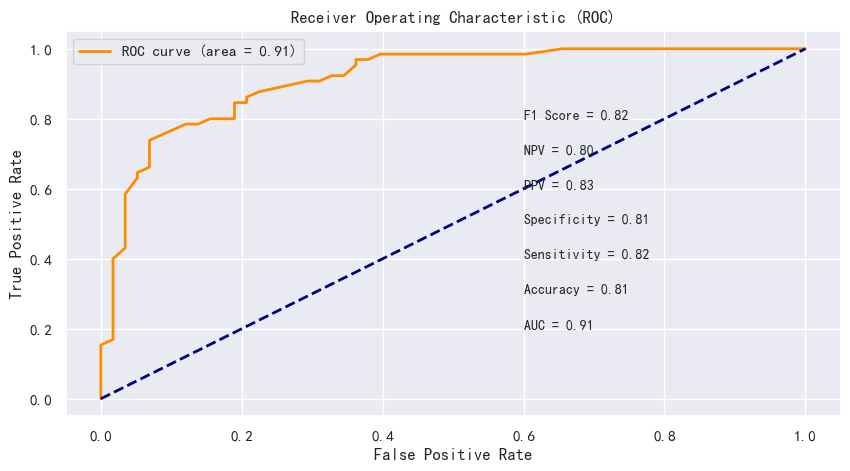

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 读取训练集数据
train_file = "训练集1.xlsx"
data1 = pd.read_excel(train_file)

# 提取特征和标签
X = data1.drop(columns=['cancer'])  # 特征
y = data1['cancer']  # 标签

# 归一化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# 创建随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测概率
y_scores = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# 寻找最佳截断值
best_threshold = 0.43

# 根据最佳截断值预测类别
y_pred_thresholded = (y_scores[:, 1] > best_threshold).astype(int)

# 计算性能指标
accuracy = accuracy_score(y_test, y_pred_thresholded)
sensitivity = recall_score(y_test, y_pred_thresholded)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresholded).ravel()
specificity = tn / (tn + fp)
ppv = precision_score(y_test, y_pred_thresholded)
npv = tn / (tn + fn)
f1 = f1_score(y_test, y_pred_thresholded)

# 绘制ROC曲线
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.grid(True)
plt.legend()

# 显示AUC值
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=10)

# 显示性能指标
plt.text(0.6, 0.3, f'Accuracy = {accuracy:.2f}', fontsize=10)
plt.text(0.6, 0.4, f'Sensitivity = {sensitivity:.2f}', fontsize=10)
plt.text(0.6, 0.5, f'Specificity = {specificity:.2f}', fontsize=10)
plt.text(0.6, 0.6, f'PPV = {ppv:.2f}', fontsize=10)
plt.text(0.6, 0.7, f'NPV = {npv:.2f}', fontsize=10)
plt.text(0.6, 0.8, f'F1 Score = {f1:.2f}', fontsize=10)

plt.show()



Performance Metrics:
      Accuracy  Sensitivity  Specificity       PPV       NPV  F1 Score
0     0.804878     0.765957     0.857143  0.878049  0.731707  0.818182
1     0.780488     0.900000     0.666667  0.720000  0.875000  0.800000
2     0.802469     0.947368     0.674419  0.720000  0.935484  0.818182
3     0.827160     0.948718     0.714286  0.755102  0.937500  0.840909
4     0.851852     0.894737     0.813953  0.809524  0.897436  0.850000
Mean  0.813369     0.891356     0.745293  0.776535  0.875425  0.825455


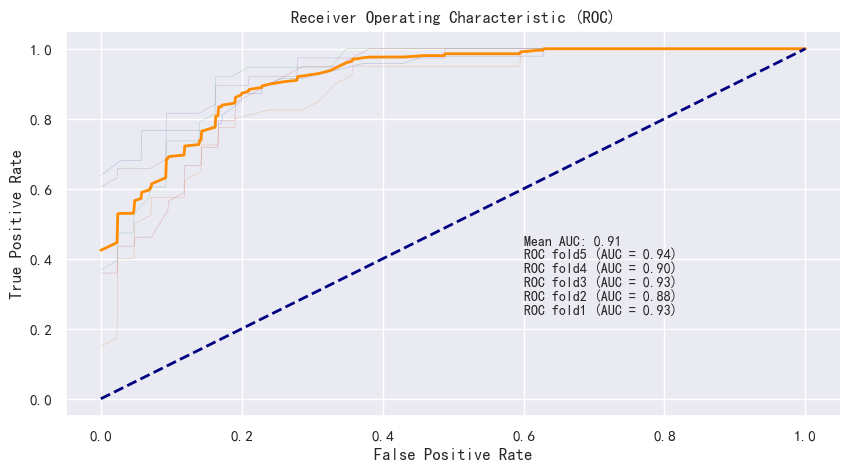

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 读取训练集数据
train_file = "训练集1.xlsx"
data1 = pd.read_excel(train_file)

# 提取特征和标签
X = data1.drop(columns=['cancer'])  # 特征
y = data1['cancer']  # 标签

# 归一化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 初始化存储所有ROC曲线的列表
all_fpr = []
all_tpr = []
all_auc = []
all_metrics = []

# 使用K折交叉验证来获取每次验证的ROC曲线数据和性能评价指标
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for fold_idx, (train_index, test_index) in enumerate(cv.split(X_normalized), 1):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 创建随机森林模型
    rf_model = RandomForestClassifier(random_state=42)
    
    # 训练模型
    rf_model.fit(X_train, y_train)
    
    # 预测概率
    y_scores = rf_model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # 寻找最佳截断值
    best_threshold = 0.43
    
    # 根据最佳截断值预测类别
    y_pred_thresholded = (y_scores[:, 1] > best_threshold).astype(int)
    
    # 计算性能指标
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    sensitivity = recall_score(y_test, y_pred_thresholded)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresholded).ravel()
    specificity = tn / (tn + fp)
    ppv = precision_score(y_test, y_pred_thresholded)
    npv = tn / (tn + fn)
    f1 = f1_score(y_test, y_pred_thresholded)
    
    # 存储AUC和性能指标
    all_auc.append(roc_auc)
    all_metrics.append([accuracy, sensitivity, specificity, ppv, npv, f1])
    
    # 使用插值方法使得所有数组具有相同的长度
    fpr_interp = np.linspace(0, 1, 1000)
    tpr_interp = np.interp(fpr_interp, fpr, tpr)
    
    # 将数据存储到列表中
    all_fpr.append(fpr_interp)
    all_tpr.append(tpr_interp)
    
# 计算平均AUC和性能指标
mean_auc = np.mean(all_auc, axis=0)
mean_metrics = np.mean(all_metrics, axis=0)

# 计算性能指标的平均值
mean_accuracy, mean_sensitivity, mean_specificity, mean_ppv, mean_npv, mean_f1 = mean_metrics

# 绘制所有ROC曲线
plt.figure(figsize=(10, 5))
for i in range(len(all_fpr)):
    plt.plot(all_fpr[i], all_tpr[i], lw=0.5, alpha=0.3)
plt.plot(np.mean(all_fpr, axis=0), np.mean(all_tpr, axis=0), color='darkorange', lw=2, label=f'Mean ROC (area = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.grid(True)

# 显示每一次交叉验证的AUC值
for i, auc_val in enumerate(all_auc, start=1):
    plt.text(0.6, 0.2 + 0.04 * i, f'ROC fold{i} (AUC = {auc_val:.2f})', fontsize=10)

# 显示平均AUC值
plt.text(0.6, 0.2 + 0.04 * (i + 1), f'Mean AUC: {mean_auc:.2f}', fontsize=10)

# 创建性能评价指标的表格
metrics_table = pd.DataFrame(all_metrics, columns=['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'])
metrics_table.loc['Mean'] = [mean_accuracy, mean_sensitivity, mean_specificity, mean_ppv, mean_npv, mean_f1]

# 显示性能评价指标的表格
print("Performance Metrics:")
print(metrics_table)

plt.show()


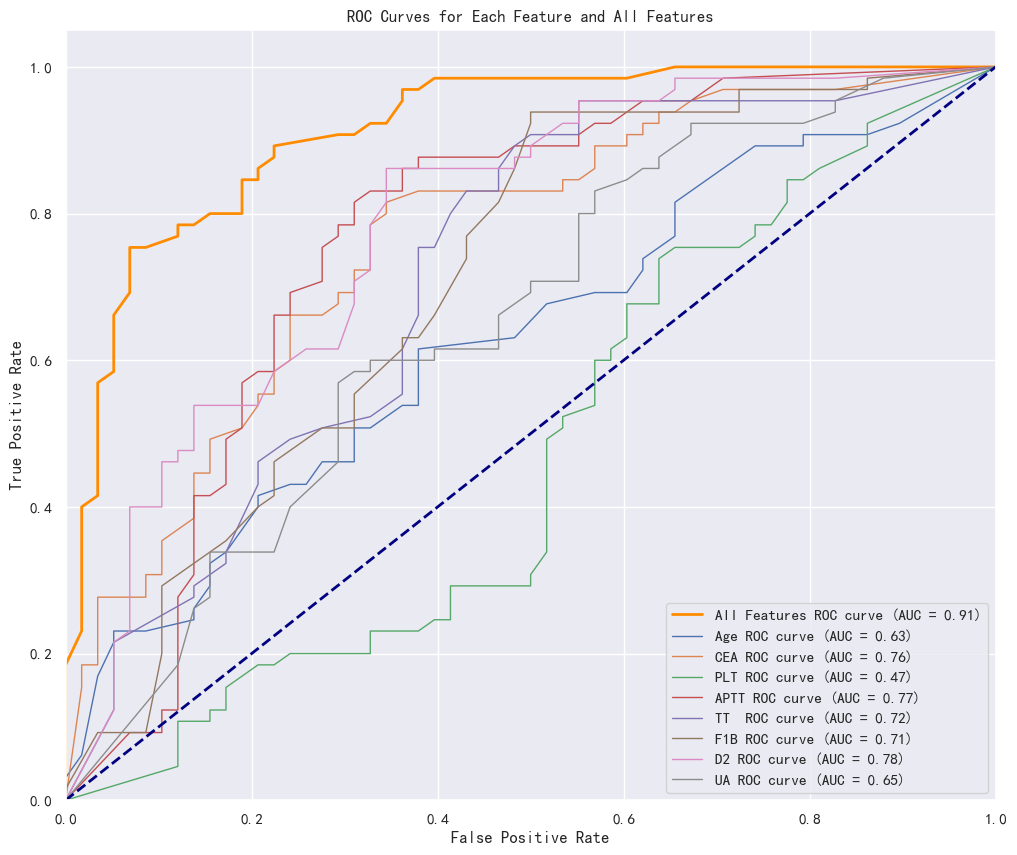

Performance metrics for each feature and all features combined:
              Accuracy  Sensitivity  Specificity       PPV       NPV  F1 Score
Age           0.585366     0.507692     0.672414  0.634615  0.549296  0.564103
CEA           0.674797     0.600000     0.758621  0.735849  0.628571  0.661017
PLT           0.512195     0.600000     0.413793  0.534247  0.480000  0.565217
APTT          0.731707     0.738462     0.724138  0.750000  0.711864  0.744186
TT            0.707317     0.861538     0.534483  0.674699  0.775000  0.756757
F1B           0.682927     0.815385     0.534483  0.662500  0.720930  0.731034
D2            0.658537     0.615385     0.706897  0.701754  0.621212  0.655738
UA            0.585366     0.630769     0.534483  0.602941  0.563636  0.616541
All Features  0.829268     0.784615     0.879310  0.879310  0.784615  0.829268


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 读取训练集数据
train_file = "训练集1.xlsx"
data1 = pd.read_excel(train_file)

# 提取特征和标签
X = data1.drop(columns=['cancer'])  # 特征
y = data1['cancer']  # 标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化随机森林分类器
clf = RandomForestClassifier(random_state=42)

# 创建空的DataFrame存储性能指标
performance_df = pd.DataFrame(index=X.columns,
                              columns=['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'])

# 创建图表
plt.figure(figsize=(12, 10))

# 整体特征联合建模并评估性能
clf.fit(X_train, y_train)
y_pred_all = clf.predict(X_test)

# 计算整体性能指标
tn_all, fp_all, fn_all, tp_all = confusion_matrix(y_test, y_pred_all).ravel()
accuracy_all = accuracy_score(y_test, y_pred_all)
sensitivity_all = recall_score(y_test, y_pred_all)
specificity_all = tn_all / (tn_all + fp_all)
ppv_all = precision_score(y_test, y_pred_all)
npv_all = tn_all / (tn_all + fn_all)
f1_all = f1_score(y_test, y_pred_all)

# 将整体性能指标存入DataFrame
performance_df.loc['All Features'] = [accuracy_all, sensitivity_all, specificity_all, ppv_all, npv_all, f1_all]

# 绘制整体ROC曲线
fpr_all, tpr_all, thresholds_all = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc_all = auc(fpr_all, tpr_all)
plt.plot(fpr_all, tpr_all, color='darkorange', lw=2, label=f'All Features ROC curve (AUC = {roc_auc_all:.2f})')

# 单独特征建模并评估性能
for feature in X.columns:
    X_single_feature = X[[feature]]
    X_train_single, X_test_single, _, _ = train_test_split(X_single_feature, y, test_size=0.3, random_state=42)
    
    # 使用随机森林分类器作为示例模型
    clf.fit(X_train_single, y_train)
    y_pred = clf.predict(X_test_single)
    
    # 计算性能指标
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    ppv = precision_score(y_test, y_pred)
    npv = tn / (tn + fn)
    f1 = f1_score(y_test, y_pred)
    
    # 将性能指标存入DataFrame
    performance_df.loc[feature] = [accuracy, sensitivity, specificity, ppv, npv, f1]
    
    # 计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_single)[:,1])
    roc_auc = auc(fpr, tpr)
    
    # 绘制单独特征的ROC曲线
    plt.plot(fpr, tpr, lw=1, label=f'{feature} ROC curve (AUC = {roc_auc:.2f})')

# 绘制ROC曲线的其他设置
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Feature and All Features')
plt.legend(loc="lower right")
plt.show()

# 打印性能指标表格
print("Performance metrics for each feature and all features combined:")
print(performance_df)





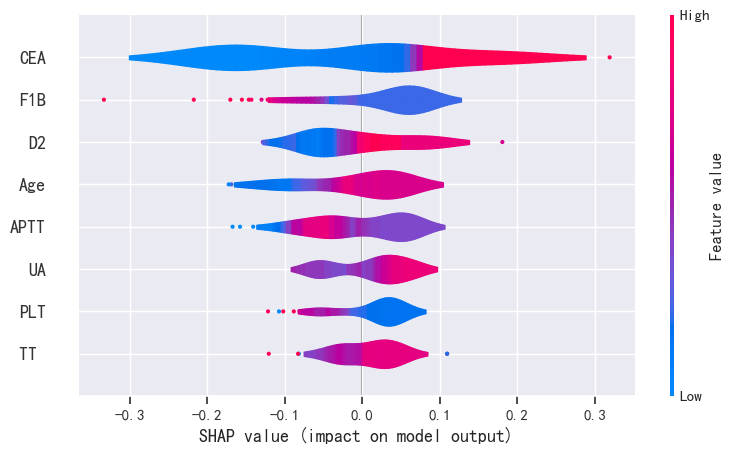

In [12]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 读取数据集
data = pd.read_excel("训练集1.xlsx")

# 提取特征和标签
X = data.drop(columns=['cancer'])  # 特征
y = data['cancer']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测概率
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # 获取正例的预测概率

# 应用最佳截断值
best_threshold = 0.43
y_pred_thresholded = (y_pred_prob > best_threshold).astype(int)

# 计算SHAP值
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# 绘制密度图
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X_test.columns, plot_type="violin", title="SHAP value (impact on CRC)")

# 获取每个特征的 SHAP 值的平均影响
shap_values_mean = np.mean(shap_values, axis=0)
shap_values_mean = shap_values_mean[:, 1]  # 获取类别为1的 SHAP 值






















In [13]:
import shap

# 使用训练好的解释器计算SHAP值
shap_values = explainer.shap_values(X_test)

# 确保 SHAP 值的形状正确
print("SHAP values shape:", shap_values.shape)

# 查看第三个样本的SHAP值（对于类别 0）
sample_index = 3  
shap.force_plot(explainer.expected_value[1], shap_values[sample_index][:, 1], X_test.iloc[sample_index], feature_names=X_test.columns)

SHAP values shape: (123, 8, 2)


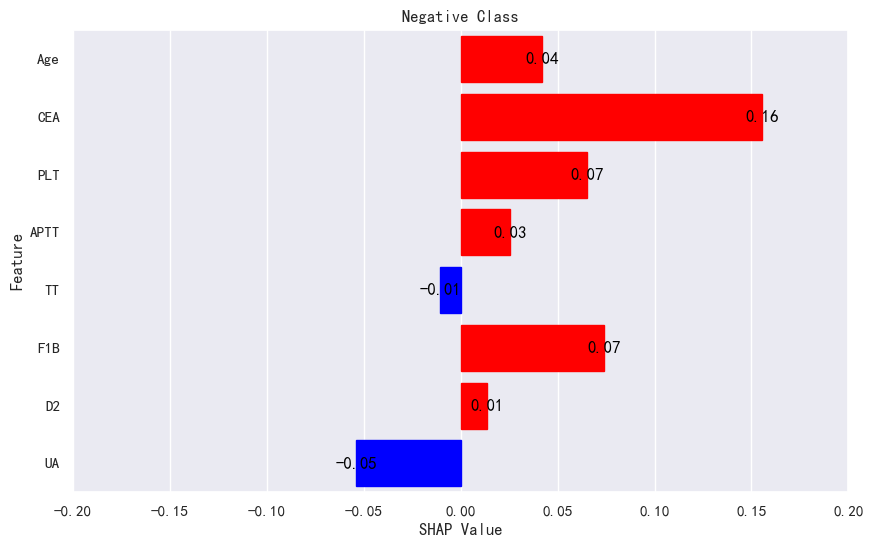

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 第4号样本的SHAP值
shap_values_sample = shap_values[3]

# 特征名称
feature_names = ['Age',  'CEA', 'PLT', 'APTT', 'TT', 'F1B', 'D2', 'UA']

# 创建包含特征名称和对应 SHAP 值的数据集
shap_df_pos = pd.DataFrame({'Feature': feature_names, 'SHAP Value': shap_values_sample[:, 0]})
shap_df_neg = pd.DataFrame({'Feature': feature_names, 'SHAP Value': shap_values_sample[:, 1]})



# 绘制负类别的SHAP值的条形图
plt.figure(figsize=(10, 6))
bar_plot_neg = sns.barplot(x='SHAP Value', y='Feature', data=shap_df_neg, color='blue')

# 设置图形属性
plt.title('Negative Class')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.xlim(-0.2, 0.2)  # 根据你的数据范围设置合适的值

# 将大于0的SHAP值的条形改为红色，小于0的改为蓝色，并在每个条形上标注实际值和SHAP值
for i in range(len(feature_names)):
    shap_value = shap_values_sample[i, 1]  # 负类别的SHAP值
    if shap_value > 0:
        bar_plot_neg.patches[i].set_color('red')
    elif shap_value < 0:
        bar_plot_neg.patches[i].set_color('blue')
    plt.text(shap_value, i, f'{shap_value:.2f}', va='center', ha='center', color='black', fontsize=12)

plt.show()

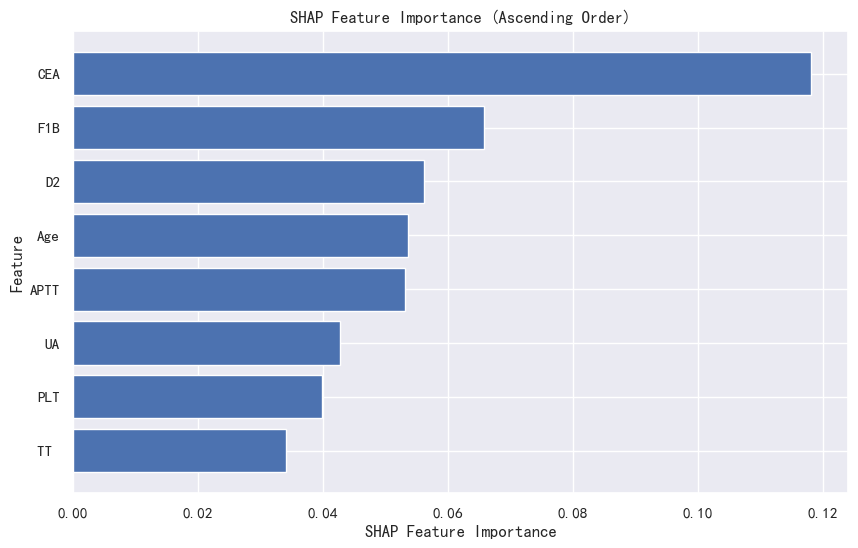

In [15]:
# 计算特征重要性
feature_importance = np.abs(shap_values).mean(axis=0)

# 提取特征名称和其对应的重要性
features = X_test.columns
importance_values = feature_importance[:, 1]

# 对特征重要性进行排序
sorted_indices = np.argsort(importance_values)  # 升序排序

# 创建特征重要性的水平条形图
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], importance_values[sorted_indices])  # 使用排序后的特征名称和重要性
plt.xlabel('SHAP Feature Importance')
plt.ylabel('Feature')
plt.title('SHAP Feature Importance (Ascending Order)')
plt.show()





In [16]:
# 创建包含预测结果和特征信息的数据框
predictions_df = pd.DataFrame(X_test)  # 创建一个包含特征信息的数据框
predictions_df['Actual'] = y_test  # 添加实际标签列
predictions_df['Predicted'] = y_pred_prob  # 添加预测概率列

# 将数据框保存到 Excel 文件中
predictions_df.to_excel('预测结果.xlsx', index=False)



In [17]:
shap.initjs()


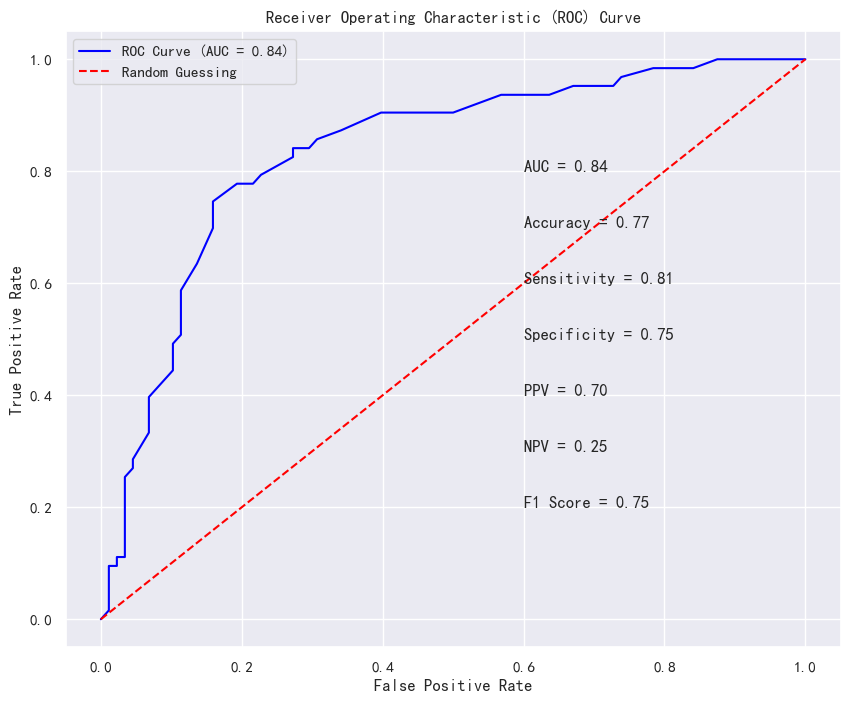

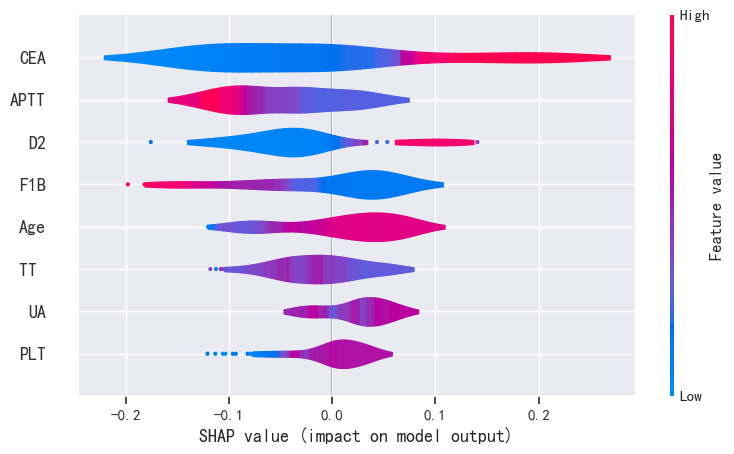

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, roc_curve
import shap

# 读取数据集
data1 = pd.read_excel("训练集1.xlsx")
data2 = pd.read_excel("测试集1.xlsx")

# 提取特征和标签
X_train = data1.drop(columns=['cancer'])  # 训练集特征
y_train = data1['cancer']  # 训练集标签
X_test = data2.drop(columns=['cancer'])  # 测试集特征
y_test = data2['cancer']  # 测试集标签

# 创建随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测概率
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# 使用特定截断值重新分类
cutoff = 0.43
y_pred = [1 if prob >= cutoff else 0 for prob in y_pred_prob]

# 计算性能指标
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
ppv = precision_score(y_test, y_pred)
npv = 1 - specificity
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.text(0.6, 0.8, f'AUC = {auc:.2f}', fontsize=12)
plt.text(0.6, 0.7, f'Accuracy = {accuracy:.2f}', fontsize=12)
plt.text(0.6, 0.6, f'Sensitivity = {sensitivity:.2f}', fontsize=12)
plt.text(0.6, 0.5, f'Specificity = {specificity:.2f}', fontsize=12)
plt.text(0.6, 0.4, f'PPV = {ppv:.2f}', fontsize=12)
plt.text(0.6, 0.3, f'NPV = {npv:.2f}', fontsize=12)
plt.text(0.6, 0.2, f'F1 Score = {f1:.2f}', fontsize=12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# 计算SHAP值
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# 绘制密度图
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X_test.columns, plot_type="violin", title="SHAP value (impact on CRC)")

# 获取每个特征的 SHAP 值的平均影响
shap_values_mean = np.mean(shap_values, axis=0)
shap_values_mean = shap_values_mean[:, 0]  # 获取类别为1的 SHAP 值
import matplotlib.pyplot as plt
import seaborn as sns
# 创建包含测试集特征和预测概率的 DataFrame
data_with_proba = X_test.copy()  # 复制测试集特征
data_with_proba['Predicted Probability_RF'] = y_pred_prob  # 添加预测概率列

# 将DataFrame保存为Excel文件
data_with_proba.to_excel('测试集预测结果.xlsx', index=False)








In [19]:
import shap

# 使用训练好的解释器计算SHAP值
shap_values = explainer.shap_values(X_test)

# 确保 SHAP 值的形状正确
print("SHAP values shape:", shap_values.shape)

# 查看第三个样本的SHAP值（对于类别 0）
sample_index = 1  
shap.force_plot(explainer.expected_value[1], shap_values[sample_index][:, 1], X_test.iloc[sample_index], feature_names=X_test.columns)










SHAP values shape: (151, 8, 2)


In [20]:
# 第8号样本的实际值
actual_values = X_test.iloc[3]

# 打印实际值
print("Actual Values:")
for feature, value in zip(feature_names, actual_values):
    print(f"{feature}: {value}")


Actual Values:
Age: 53.0
CEA: 2.91
PLT: 142.0
APTT: 29.9
TT: 15.7
F1B: 5.22
D2: 3.67
UA: 122.0


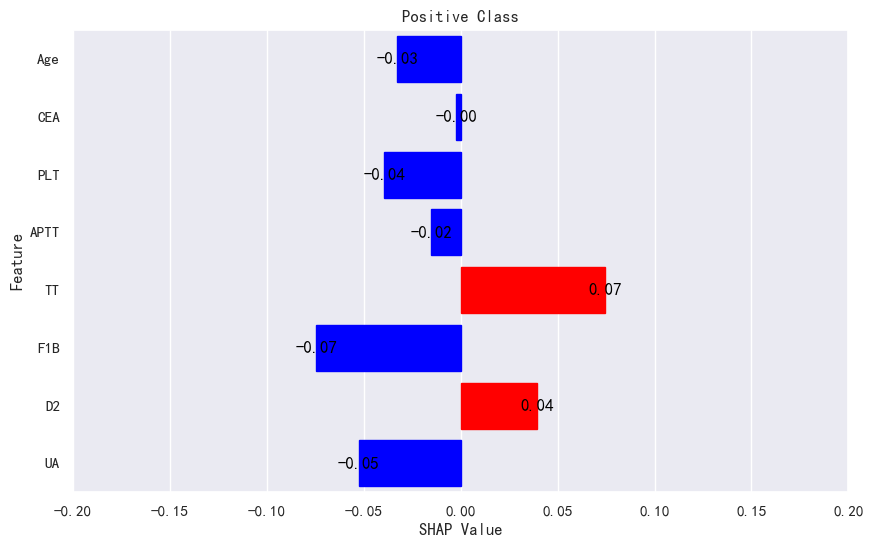

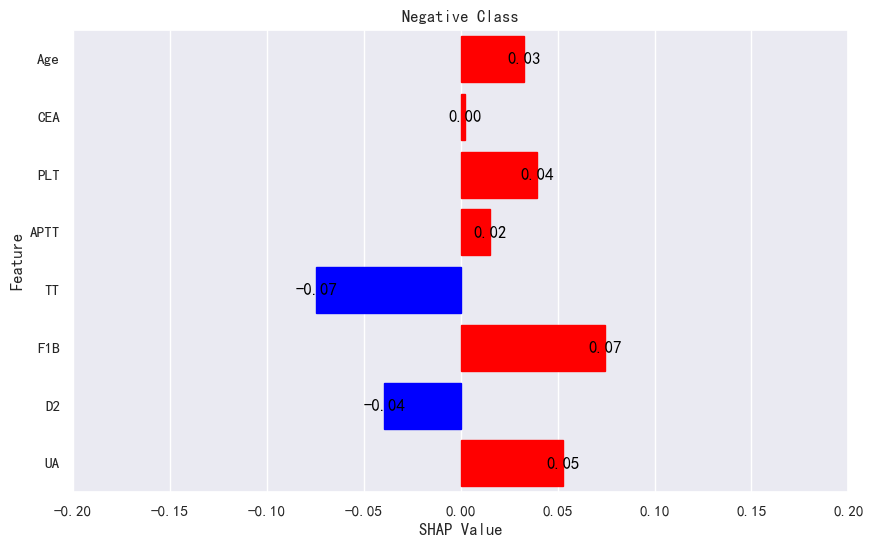

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 第4号样本的SHAP值
shap_values_sample = shap_values[1]

# 特征名称
feature_names = ['Age', 'CEA', 'PLT', 'APTT', 'TT', 'F1B', 'D2', 'UA']

# 创建包含特征名称和对应 SHAP 值的数据集
shap_df_pos = pd.DataFrame({'Feature': feature_names, 'SHAP Value': shap_values_sample[:, 0]})
shap_df_neg = pd.DataFrame({'Feature': feature_names, 'SHAP Value': shap_values_sample[:, 1]})

# 绘制正类别的SHAP值的条形图
plt.figure(figsize=(10, 6))
bar_plot_pos = sns.barplot(x='SHAP Value', y='Feature', data=shap_df_pos, color='red')

# 设置图形属性
plt.title('Positive Class')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.xlim(-0.2, 0.2)  # 根据你的数据范围设置合适的值

# 将大于0的SHAP值的条形改为红色，小于0的改为蓝色，并在每个条形上标注实际值和SHAP值
for i in range(len(feature_names)):
    shap_value = shap_values_sample[i, 0]
    if shap_value > 0:
        bar_plot_pos.patches[i].set_color('red')
    elif shap_value < 0:
        bar_plot_pos.patches[i].set_color('blue')
    plt.text(shap_value, i, f'{shap_value:.2f}', va='center', ha='center', color='black', fontsize=12)

plt.show()

# 绘制负类别的SHAP值的条形图
plt.figure(figsize=(10, 6))
bar_plot_neg = sns.barplot(x='SHAP Value', y='Feature', data=shap_df_neg, color='blue')

# 设置图形属性
plt.title('Negative Class')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.xlim(-0.2, 0.2)  # 根据你的数据范围设置合适的值

# 将大于0的SHAP值的条形改为红色，小于0的改为蓝色，并在每个条形上标注实际值和SHAP值
for i in range(len(feature_names)):
    shap_value = shap_values_sample[i, 1]  # 负类别的SHAP值
    if shap_value > 0:
        bar_plot_neg.patches[i].set_color('red')
    elif shap_value < 0:
        bar_plot_neg.patches[i].set_color('blue')
    plt.text(shap_value, i, f'{shap_value:.2f}', va='center', ha='center', color='black', fontsize=12)

plt.show()
